## In this project, we are going to build a model that predicts a car's price based on the car's attributes.

### Data Exploration

In [1]:
#Read the dataset
import pandas as pd

cars = pd.read_csv("imports-85.data")

In [2]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


**It looks like the column names are missing - hence, we will derive them from documentation**

In [3]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
           'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
           'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
           'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
           'city-mpg', 'highway-mpg', 'price']

In [4]:
#Read in the data again
cars = pd.read_csv("imports-85.data", names=col_names)

In [5]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#Display all columns
pd.options.display.max_columns = cars.shape[1]

In [7]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

**Keeping only numeric columns. 'The normalized-losses' contains characters, but is still a numeric column**

In [9]:
#List of numeric columns
numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                   'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
                   'city-mpg', 'highway-mpg', 'price']

## Data Cleaning

In [10]:
import numpy as np
#Clean the numeric columns
cars_numeric = cars[numeric_columns]
cars_numeric = cars_numeric.replace('?', np.nan)
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
cars_numeric = cars_numeric.astype(float)
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [12]:
#nr of missing values
cars_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [13]:
#Since we're predicting the price, remove all rows with no price info
cars_numeric.dropna(subset=['price'], inplace=True)
cars_numeric.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [14]:
#Replace empty values with the average of each columns value
cars_numeric = cars_numeric.fillna(cars_numeric.mean())
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
#Normalize all the numeric columns to be in range 0 to 1
cars_numeric = (cars_numeric - cars_numeric.min()) / \
(cars_numeric.max() - cars_numeric.min())
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


## Univariate Models

In [16]:
#Create a funciton that trains & validates a model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def knn_train_test(train_cols, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    #randomize the df
    df_index_rand = np.random.permutation(df.copy().index)
    randomized_df = df.reindex(df_index_rand)
    #divide nr of rows in half, 1 for training and the other for testing
    last_row = int(len(randomized_df) / 2)
    #divide the train/test set
    train_df = randomized_df.iloc[:last_row]
    test_df = randomized_df.iloc[last_row:]
    #train the model
    knn.fit(train_df[train_cols], train_df[target_col])
    #make predictions with the model
    predictions = knn.predict(test_df[train_cols])
    #Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    
    return rmse

In [17]:
#Test the function on the numeric values. Per column, use the model to
#determine its rmse

rmse_results = {}
train_cols = cars_numeric.drop('price', axis=1)
for col in train_cols:
    col_rmse = knn_train_test([col], 'price', cars_numeric) 
    rmse_results[col] = col_rmse

In [18]:
rmse_results

{'bore': 0.1683289753409954,
 'city-mpg': 0.1183263617767274,
 'compression-rate': 0.1641133050285271,
 'curb-weight': 0.109257689657741,
 'engine-size': 0.08039478748939273,
 'height': 0.20218561746347616,
 'highway-mpg': 0.11494034056372711,
 'horsepower': 0.10021939608643465,
 'length': 0.13473017627815678,
 'normalized-losses': 0.1819720384646851,
 'peak-rpm': 0.19108931275590788,
 'stroke': 0.19876196675058594,
 'wheel-base': 0.13558298986825523,
 'width': 0.11678870437675352}

**It look like the column: 'engine-size' performed the best**

### Updating the Univariate Model function using the K parameter

In [19]:
def knn_train_test(train_cols, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #randomize the df
    df_index_rand = np.random.permutation(df.index)
    randomized_df = df.reindex(df_index_rand)
    
    #divide nr of rows in half, 1 for training and the other for testing
    last_row = int(len(randomized_df) / 2)
    
    #divide the train/test set
    train_df = randomized_df.iloc[:last_row]
    test_df = randomized_df.iloc[last_row:]
    
    k_vals = [1,3,5,7,9]
    rmses_k = {}
    
    for k in k_vals:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_cols]], train_df[target_col])

        # Make predictions using model.
        predictions = knn.predict(test_df[[train_cols]])

        # Calculate and return RMSE.
        rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
        rmses_k[k] = rmse
        
    return rmses_k

In [20]:
k_rmses = {}

# For each numeric_column train a model, return RMSE value
# and add to the dictionary `k_rmses`.

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_numeric)
    k_rmses[col] = rmse_val

k_rmses

{'bore': {1: 0.2135591203143007,
  3: 0.17338363262700254,
  5: 0.1683289753409954,
  7: 0.17074867101736585,
  9: 0.1704684102586369},
 'city-mpg': {1: 0.1464957940110909,
  3: 0.1153554046156386,
  5: 0.1183263617767274,
  7: 0.12989729988995868,
  9: 0.13567373746406666},
 'compression-rate': {1: 0.2007647422303533,
  3: 0.18308583698868866,
  5: 0.1641133050285271,
  7: 0.167141683206929,
  9: 0.17438273982084887},
 'curb-weight': {1: 0.13068592003274115,
  3: 0.12467896360054696,
  5: 0.109257689657741,
  7: 0.10750727631244858,
  9: 0.11499042933455146},
 'engine-size': {1: 0.08089186500164348,
  3: 0.07051692581409814,
  5: 0.08039478748939273,
  7: 0.08845357167609393,
  9: 0.09512497927074318},
 'height': {1: 0.22104280960132835,
  3: 0.20549152581911342,
  5: 0.20218561746347616,
  7: 0.19064589951824074,
  9: 0.19390884422104737},
 'highway-mpg': {1: 0.14958529781839874,
  3: 0.11462452261031114,
  5: 0.11494034056372711,
  7: 0.11906214786224484,
  9: 0.1310351535910329},
 

### Visualizing the models

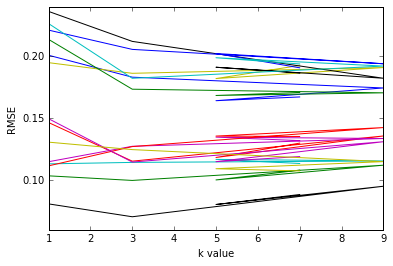

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmses.items():
    x = list(v.keys())
    y = list(v.values())

    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
 
    

In [22]:
# Average RMSE across different `k` values for each feature.
avg_rmse_feature = {}

for k,v in k_rmses.items():
    avg_rmse = np.mean(list(v.values()))
    avg_rmse_feature[k] = avg_rmse
    
series_avg_rmse = pd.Series(avg_rmse_feature)
sorted_avg_rmse = series_avg_rmse.sort_values()

sorted_avg_rmse

engine-size          0.083076
horsepower           0.104746
width                0.114664
curb-weight          0.117424
highway-mpg          0.125849
length               0.128504
city-mpg             0.129150
wheel-base           0.130391
compression-rate     0.177898
bore                 0.179298
normalized-losses    0.189276
stroke               0.198606
peak-rpm             0.201563
height               0.202655
dtype: float64

## Multivariate Model

In [37]:
def knn_train_test(train_cols, train_target, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Assign test and train datasets
    train_df = rand_df[:int((len(df) * 0.75))]
    test_df = rand_df[int((len(df) * 0.75)):]
    # Calculate Mean Squared Errors
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_cols], train_df[train_target])
    prediction = knn.predict(test_df[train_cols])
    mse = mean_squared_error(prediction, test_df[train_target])
    return mse**(1/2)

# 2,3,4,5 best attributes
two_best = ["curb-weight", "horsepower"]
three_best = ["curb-weight", "horsepower", "length"]
four_best = ["curb-weight", "horsepower", "length", "highway-mpg"]
five_best = ["curb-weight", "horsepower", "length", "highway-mpg", "engine-size"]

# Function on 2,3,4,5th best features
rmse_two_best = knn_train_test(two_best, 'price', cars_numeric)
rmse_three_best = knn_train_test(three_best, 'price', cars_numeric)
rmse_four_best = knn_train_test(four_best, 'price', cars_numeric)
rmse_five_best = knn_train_test(five_best, 'price', cars_numeric)

print("RMSE with 2 best features: {}".format(rmse_two_best))
print("RMSE with 3 best features: {}".format(rmse_three_best))
print("RMSE with 4 best features: {}".format(rmse_four_best))
print("RMSE with 5 best features: {}".format(rmse_five_best))

RMSE with 2 best features: 0.06502101529612136
RMSE with 3 best features: 0.06005133056980283
RMSE with 4 best features: 0.05999428579018187
RMSE with 5 best features: 0.06160489813508383


**It looks like the top 3 best models are:
'rmse_three_best', 
'rmse_four_best', 
'rmse_five_best'. We continue working with these models from here on.
**

## Hyper Parameter Tuning 

In [38]:
def knn_train_test(train_cols, train_target, df, k_num):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Assign test and train datasets
    train_df = rand_df[:int((len(df) * 0.75))]
    test_df = rand_df[int((len(df) * 0.75)):]
    
    # Calculate mean squared errors
    knn = KNeighborsRegressor(k_num)
    knn.fit(train_df[train_cols], train_df[train_target])
    prediction = knn.predict(test_df[train_cols])
    mse = mean_squared_error(prediction, test_df[train_target])
    return mse**(1/2)

k_nums = list(range(1, 26))

with_top_five = {}
with_top_three = {}
with_top_four = {}

# Funtion on top 3 features
for k in k_nums:
    result = knn_train_test(five_best, 'price', cars_numeric, k)
    with_top_five[k] = result
for k in k_nums:
    result = knn_train_test(three_best, 'price', cars_numeric, k)
    with_top_three[k] = result
for k in k_nums:
    result = knn_train_test(four_best, 'price', cars_numeric, k)
    with_top_four[k] = result
    
print(with_top_five)
print("\n------------------------------------------------------------------------------------")
print(with_top_three)
print("\n------------------------------------------------------------------------------------")
print(with_top_four)

{1: 0.04415014424752376, 2: 0.052481972378418326, 3: 0.05387670104716395, 4: 0.06024347305293587, 5: 0.06160489813508383, 6: 0.06351317761461267, 7: 0.062177507458673176, 8: 0.06468130713154877, 9: 0.06828263660485633, 10: 0.06939071986557963, 11: 0.07054039112262178, 12: 0.07256545354571392, 13: 0.0739454413420627, 14: 0.07801882823013376, 15: 0.08184011044099429, 16: 0.08519196432946759, 17: 0.08751351704122935, 18: 0.08973847140431047, 19: 0.0907144312489228, 20: 0.0923749901132138, 21: 0.09323549253650604, 22: 0.0938823606527252, 23: 0.09503913313060705, 24: 0.09584439374882035, 25: 0.09633942855227447}

------------------------------------------------------------------------------------
{1: 0.049199556674642625, 2: 0.06122308445308647, 3: 0.05776871800223644, 4: 0.060584531778416925, 5: 0.06005133056980283, 6: 0.06517612867014749, 7: 0.06861425602643925, 8: 0.06859148568551489, 9: 0.07277172980527936, 10: 0.07750709962281832, 11: 0.078935143794907, 12: 0.0782326913434274, 13: 0.07

## Visualizing Parameter Tuning

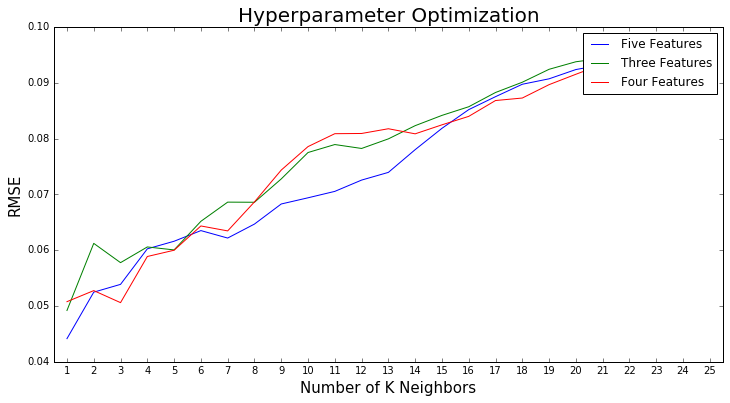

In [39]:
# Visualize Hyperparameter Optimization
plt.figure(figsize=(12,6))


plt.plot(list(with_top_five.keys()), list(with_top_five.values()), label = "Five Features")
plt.plot(list(with_top_three.keys()), list(with_top_three.values()), label = "Three Features")
plt.plot(list(with_top_four.keys()), list(with_top_four.values()), label = "Four Features")
plt.legend()
plt.xticks(range(1, 26))
plt.xlim(0.5,25.5)
plt.ylabel("RMSE", size=15)
plt.xlabel("Number of K Neighbors", size=15)
plt.title("Hyperparameter Optimization", size=20)

The 5 feature model seems to have the lowest RMSE with only 1 K-neighbor! However, this model seems too simplicity which may indicate that it is probably biased. We research parameter tuning further, using another technique: 'KFolds' 

## Using KFolds Hyper parameter Tuning

In [40]:
from sklearn.model_selection import cross_val_score, KFold

# K fold function
def knn_train_test_kfold(train_cols, train_target, df, folds):
    rmses = []
    kf = KFold(folds, shuffle=True, random_state=1)
    model = KNeighborsRegressor(3)
    mses = cross_val_score(model, df[train_cols], df[train_target],
    scoring="neg_mean_squared_error", cv=kf)
    mses = list(mses)
    for v in mses:
        v = abs(v)
        rmse = v**(1/2)
        rmses.append(rmse)
    return rmses, np.mean(rmses), np.std(rmses)
    

k_folds = list(range(2,26))

k_folds_means = {}
k_folds_std = {}

# Loop through number of k folds
for n in k_folds:
    s = knn_train_test_kfold(five_best, "price", cars_numeric, n)
    k_folds_means[n] = s[1]
    k_folds_std[n] = s[2]
    
print(k_folds_means)
print("\n------------------------------------------------------------------")
print(k_folds_std)

{2: 0.07772833347175087, 3: 0.07252959898181688, 4: 0.07046030536969365, 5: 0.06940110532025998, 6: 0.06622398448192485, 7: 0.07025000336821044, 8: 0.06640267281762413, 9: 0.06934540986790219, 10: 0.06671947391867941, 11: 0.06789495612819513, 12: 0.06868376878750301, 13: 0.06993867121401685, 14: 0.06758669753898969, 15: 0.06767899331795312, 16: 0.06750799758142839, 17: 0.06559188070681228, 18: 0.06624649937246262, 19: 0.06696352784516191, 20: 0.06580657087494919, 21: 0.06477814703683242, 22: 0.06471340480207524, 23: 0.0632641235976381, 24: 0.0641143945428961, 25: 0.06450226547337978}

------------------------------------------------------------------
{2: 0.0048632966749578566, 3: 0.00205992905249739, 4: 0.01012433817192518, 5: 0.012855501015380338, 6: 0.017719990031696026, 7: 0.013811518408397883, 8: 0.018233915427899254, 9: 0.018796619278077444, 10: 0.019303822267900055, 11: 0.02207187964704795, 12: 0.022809919994508224, 13: 0.018210397502253114, 14: 0.02160964934248079, 15: 0.0243461

## Visualizing KFolds Hyper Parameter Tuning

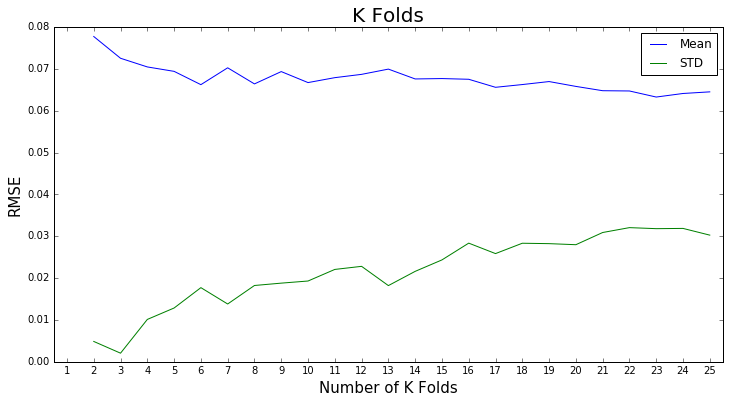

In [41]:
# Visualize K folds
plt.figure(figsize=(12,6))

plt.plot(list(k_folds_means.keys()), list(k_folds_means.values()), label='Mean')
plt.plot(list(k_folds_std.keys()), list(k_folds_std.values()), label='STD')
plt.legend()
plt.xticks(range(1, 26))
plt.xlim(0.5,25.5)
plt.ylabel("RMSE", size=15)
plt.xlabel("Number of K Folds", size=15)
plt.title("K Folds", size=20)

**In the picture above we observer an optimal Kfold value of 8, below that the RMSE increases and above that the STD increases which indicates a high variance.**

## Conclusion

**It turns out that the model with 4 features perfoms best with the lowest rmse. These feature are:**

- engine-size
- curb-weight
- horsepower
- highway-mpg

**The optimal k-value obtained was around 8**